# Scanpy: Dotplot Figure

### Setup and Load Data

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import scipy.sparse
import cmasher as cmr
from natsort import natsorted
import sys 
import os
sys.path.append(os.path.abspath("D:\jupyter_3_10\jl_modules"))
import sc_module as sm
from collections import OrderedDict
import decoupler as dc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80) 

# *** Input File ***  h5 file  
sample_name = r'controls'
h5_file_path = r'../results/'
clustered_file = h5_file_path + sample_name + '_final.h5ad'

scanpy==1.10.1 anndata==0.8.0 umap==0.5.3 numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 scikit-learn==1.1.1 statsmodels==0.14.2 igraph==0.10.8 louvain==0.8.2 pynndescent==0.5.7


In [2]:
# deal with bug in scanpy
plt.rcParams['axes.grid'] = False

In [3]:
cluster_type = 'my_clust_1'

### Read data

In [4]:
# clustered data
adata = sc.read_h5ad(clustered_file)
adata.uns['log1p']["base"] = None    # bug fix

print(adata.obs['sample'].value_counts())
print()
print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
print('X size =', adata.X.shape)

sample
control3    7395
control2    6385
control1    2185
Name: count, dtype: int64

X matrix is sparse: False
X size = (15965, 21870)


### Cell Type Labels

From Final Annotation Figure

In [5]:
annotation_dict= {
'0': 'CAP1',
'12': 'CAP2',
'21': 'VEC',
'17': 'AEC',
'28': 'LEC',

'14': 'Ciliated',
'5': 'Secretory',
'1': 'AT1',
'2': 'AT2',

'3': 'AF',
# '9': 'AF2',
'20': 'Pericyte',
'26': 'SMC',

'18': 'Mesothelial',

'8': 'B1',
    
'23b': 'Th1',
'11': 'Tnaive',

'24': 'NK',
    
'10': 'AM',
'15b': 'M-C1q',
'25': 'iMon',
'15': 'DC',
'15c': 'pDC',
'22': 'N1',
}

# Add cell type column based on annotation
adata.obs['cell_type'] = [annotation_dict[clust] for clust in adata.obs[cluster_type]]

# Error checking
dict_list = list(annotation_dict.keys())
adata_list = list(adata.obs['my_clust_1'].unique())
print('Keys in dictionary not in adata:', [item for item in dict_list if item not in adata_list] )
print('Keys in adata not in dictionary:', [item for item in adata_list if item not in dict_list] )

# print(list(annotation_dict.values()))

Keys in dictionary not in adata: []
Keys in adata not in dictionary: []


<Axes: title={'center': 'cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

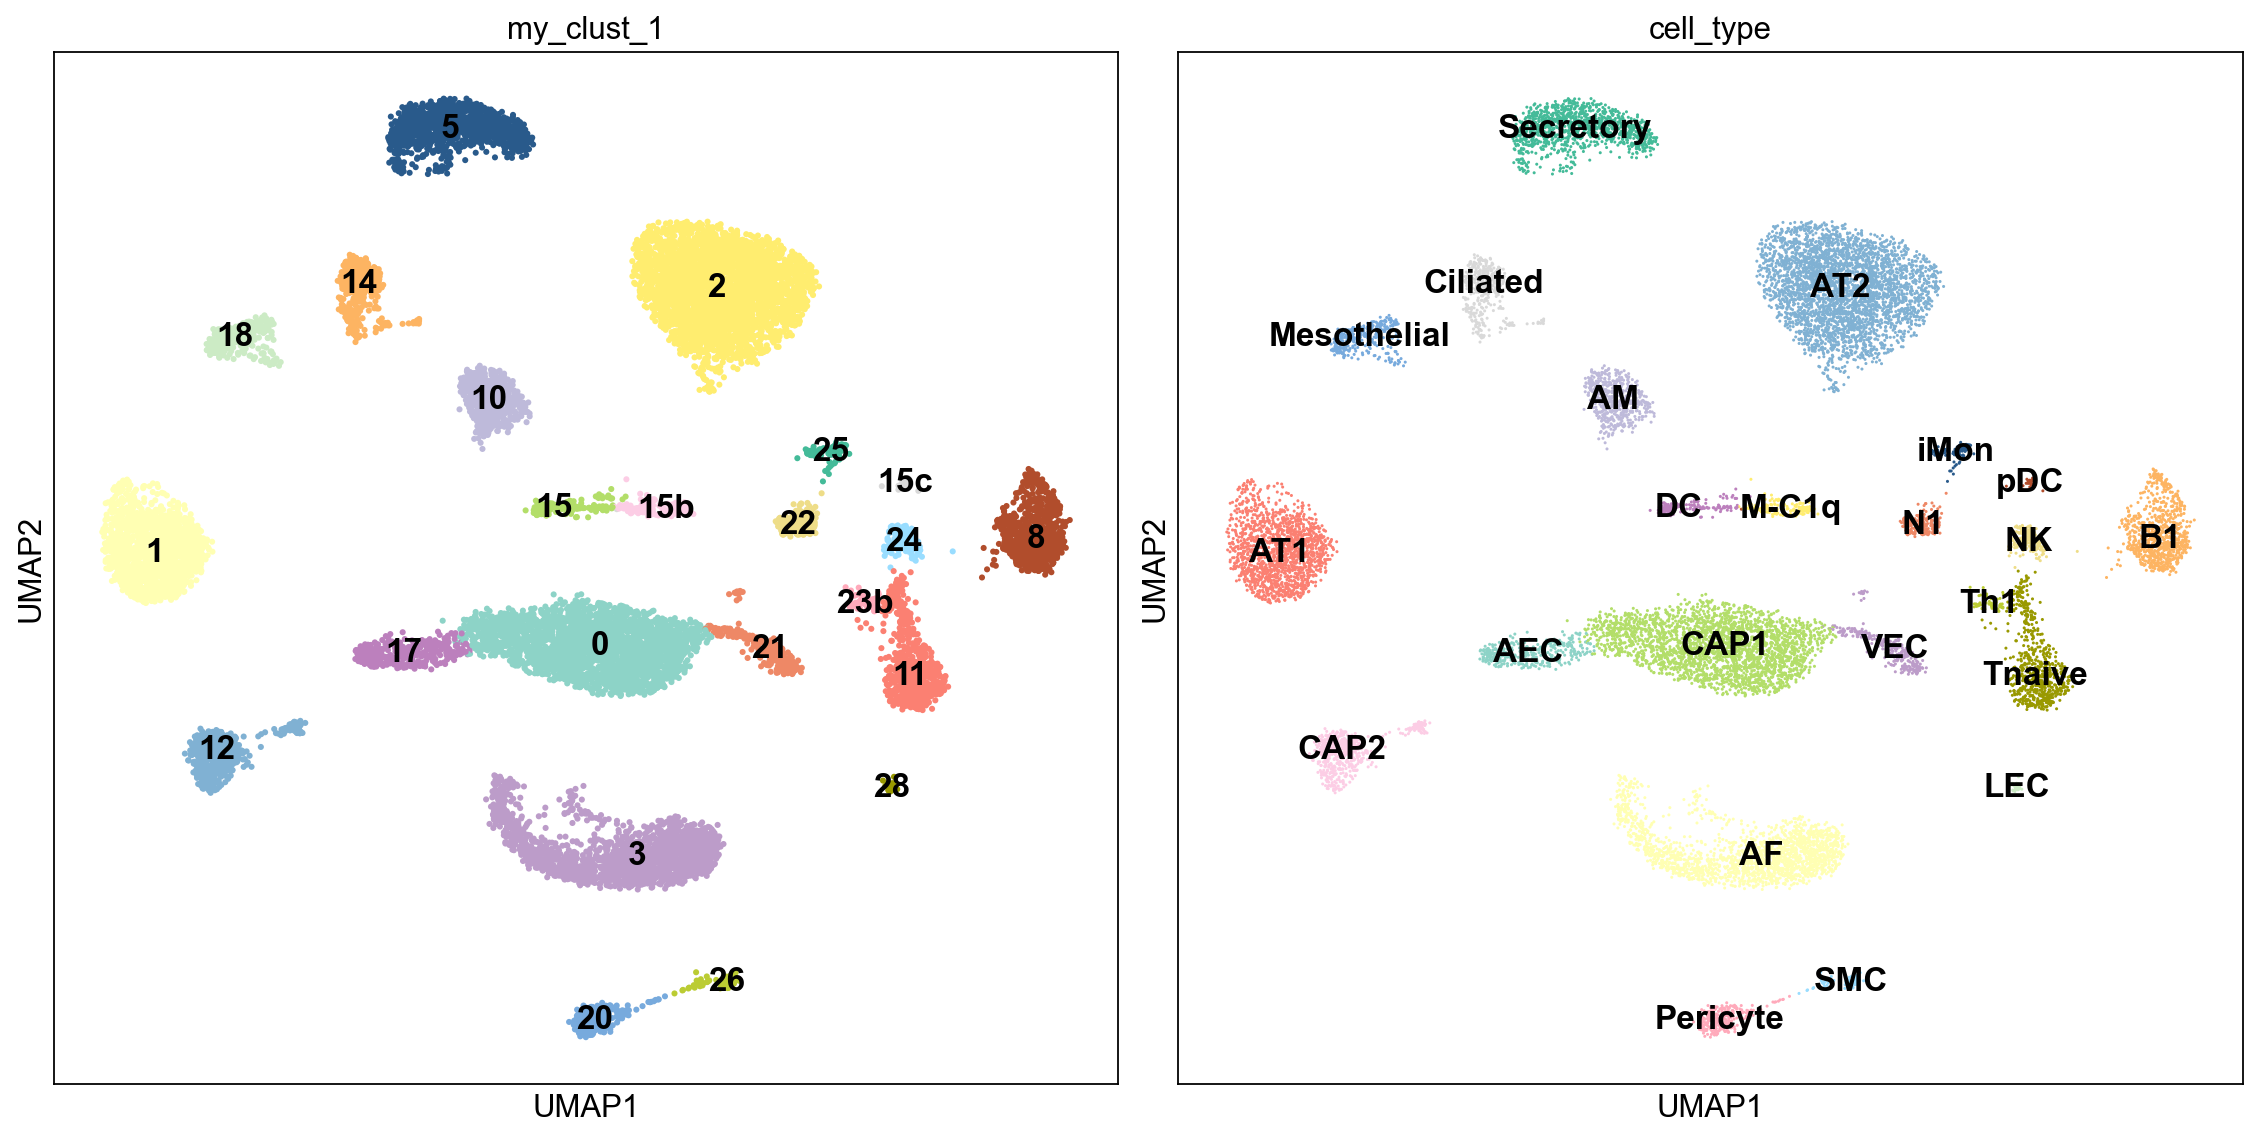

In [6]:
plt.rcParams.update({'font.size': 15})   # cluster labels
fig, axs = plt.subplots(1, 2, figsize=(14,7),constrained_layout=True)
sc.pl.umap(adata, color=cluster_type, size=30, ax=axs[0], show=False, legend_loc='on data', palette=sm.wes)
sc.pl.umap(adata, color='cell_type', ax=axs[1], show=False, legend_loc='on data', palette=sm.wes)

### Add Top Level Annotation

In [7]:
top_dict = {
'Endothelial': ['CAP1','CAP2','VEC','AEC','LEC'],
'Epithelial': ['Ciliated','Secretory','AT1','AT2','AT2-t1','AT2-t2'],
'Mesenchyme': ['AF','Pericyte','SMC','Mesothelial'],
'Immune': ['B1','B2','Th1','Tnaive','Treg','Tex','NK',
           'AM','M-t1','M-t2','M-C1q','M-lc','iMon','DC','pDC','N1','N2']
}

In [8]:
L1_annotation ={}

for cell_type, cluster_num in top_dict.items():
    for x in cluster_num:
        L1_annotation[x] = cell_type

adata.obs["top_annotation"] = adata.obs['cell_type'].map(L1_annotation)

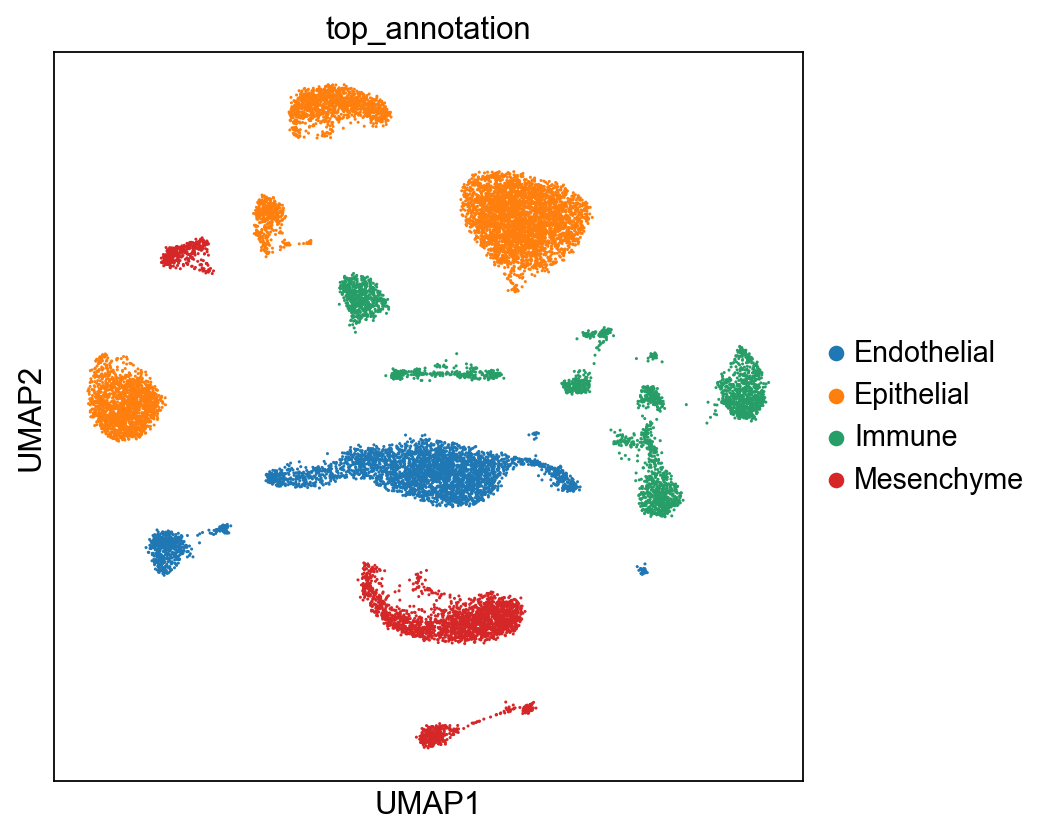

In [9]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures
sc.pl.umap(adata, color=["top_annotation"])

### Add Second Level Annotation

In [10]:
second_dict = {
'Blood vessels': ['CAP1','CAP2','VEC','AEC'],
'Lymphatic EC': ['LEC'],
'Airway epithelium': ['Ciliated','Secretory'],
'Alveolar epithelium' : ['AT1','AT2','AT2-t1','AT2-t2'],
'Stromal': ['AF','Pericyte','SMC'],
'Mesothelial': ['Mesothelial'],
'Lymphoid': ['B1','B2','Th1','Tnaive','Treg','Tex','NK'],
'Myeloid': ['AM','M-t1','M-t2','M-C1q','M-lc','iMon','DC','pDC','N1','N2']
}

In [11]:
L2_annotation ={}

for cell_type, cluster_num in second_dict.items():
    for x in cluster_num:
        L2_annotation[x] = cell_type

adata.obs["second_annotation"] = adata.obs['cell_type'].map(L2_annotation)

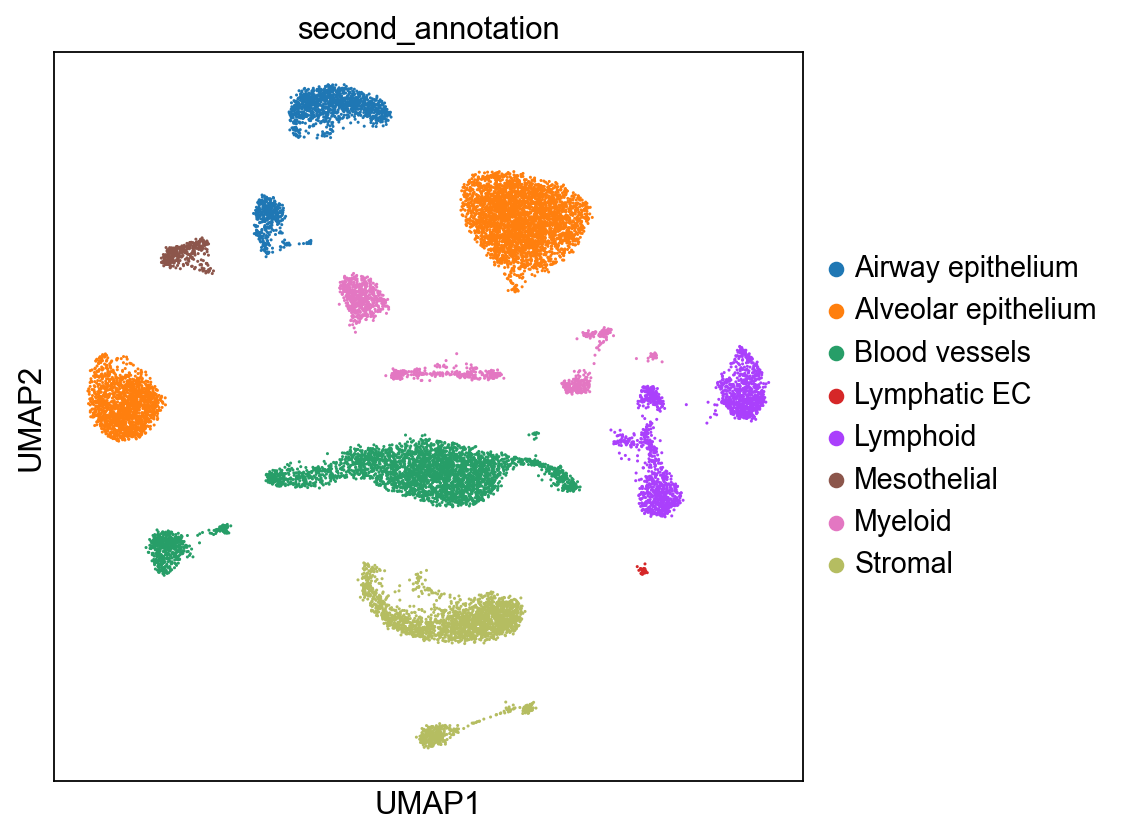

In [12]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures
sc.pl.umap(adata, color=["second_annotation"])

### Add Third Level Annotation

In [13]:
third_dict = {
'Blood vessels': ['CAP1','CAP2','VEC','AEC'],
'Lymphatic EC': ['LEC'],
'Airway epithelium': ['Ciliated','Secretory'],
'Alveolar epithelium': ['AT1','AT2','AT2-t1','AT2-t2'],
'Fibroblast': ['AF','Pericyte'],
'Smooth muscle': ['SMC'],
'Mesothelial': ['Mesothelial'],
'B lineage': ['B1','B2'],
'T lineage': ['Th1','Tnaive','Treg','Tex'],
'NK': ['NK'],
'mononuclear': ['AM','M-t1','M-t2','M-C1q','M-lc','iMon','DC','pDC'],
'polymorphonuclear': ['N1','N2']
}

In [14]:
L3_annotation ={}

for cell_type, cluster_num in third_dict.items():
    for x in cluster_num:
        L3_annotation[x] = cell_type

adata.obs["third_annotation"] = adata.obs['cell_type'].map(L3_annotation)

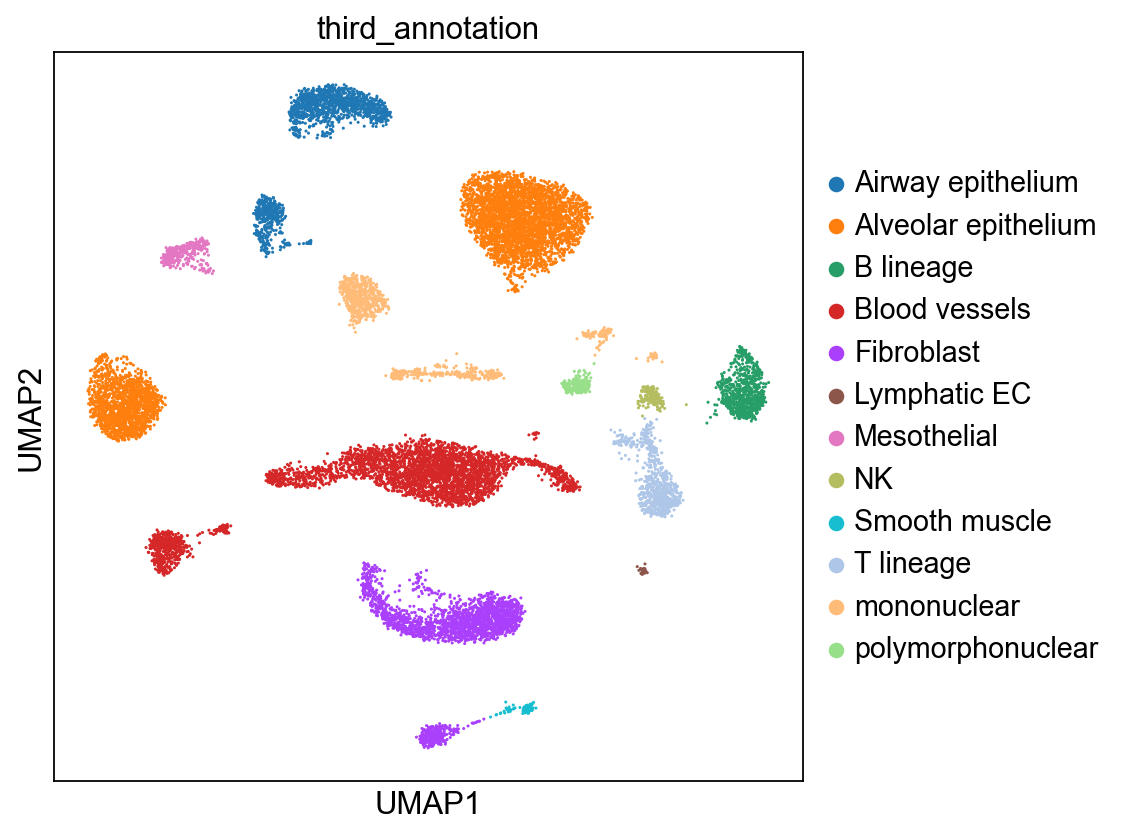

In [15]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures
sc.pl.umap(adata, color=["third_annotation"])

### Add Fourth Level Annotation

In [16]:
fourth_dict = {
'Blood vessels': ['CAP1','CAP2','VEC','AEC'],
'Lymphatic EC': ['LEC'],
'Airway epithelium': ['Ciliated','Secretory'],
'Alveolar epithelium': ['AT1','AT2','AT2-t1','AT2-t2'],
'Fibroblast': ['AF','Pericyte'],
'Smooth muscle': ['SMC'],
'Mesothelial': ['Mesothelial'],
'B lineage': ['B1','B2'],
'T lineage': ['Th1','Tnaive','Treg','Tex'],
'NK': ['NK'],
'Macrophage': ['AM','M-t1','M-t2','M-C1q','M-lc'],        
'mononuclear': ['iMon','DC','pDC'],
'Neutrophil': ['N1','N2']
}

In [17]:
L4_annotation ={}

for cell_type, cluster_num in fourth_dict.items():
    for x in cluster_num:
        L4_annotation[x] = cell_type

adata.obs["fourth_annotation"] = adata.obs['cell_type'].map(L4_annotation)

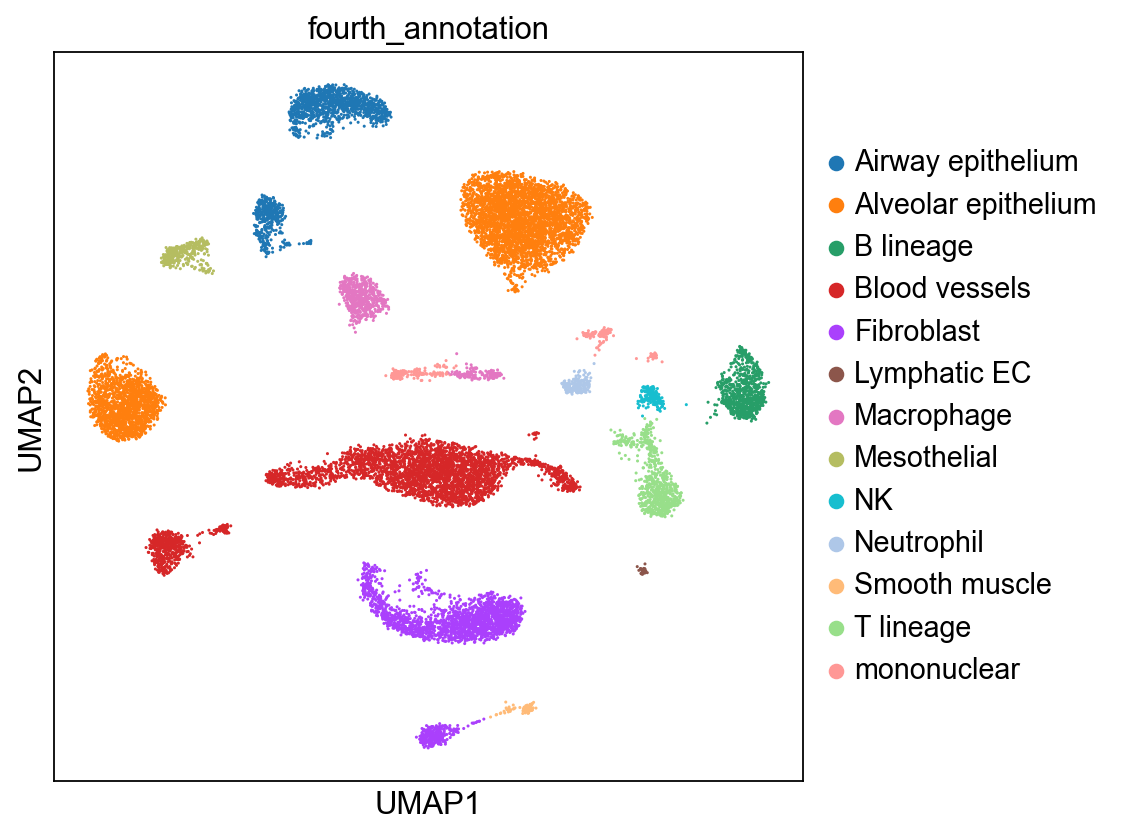

In [18]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures
sc.pl.umap(adata, color=["fourth_annotation"])

### Lowest Level Annotation

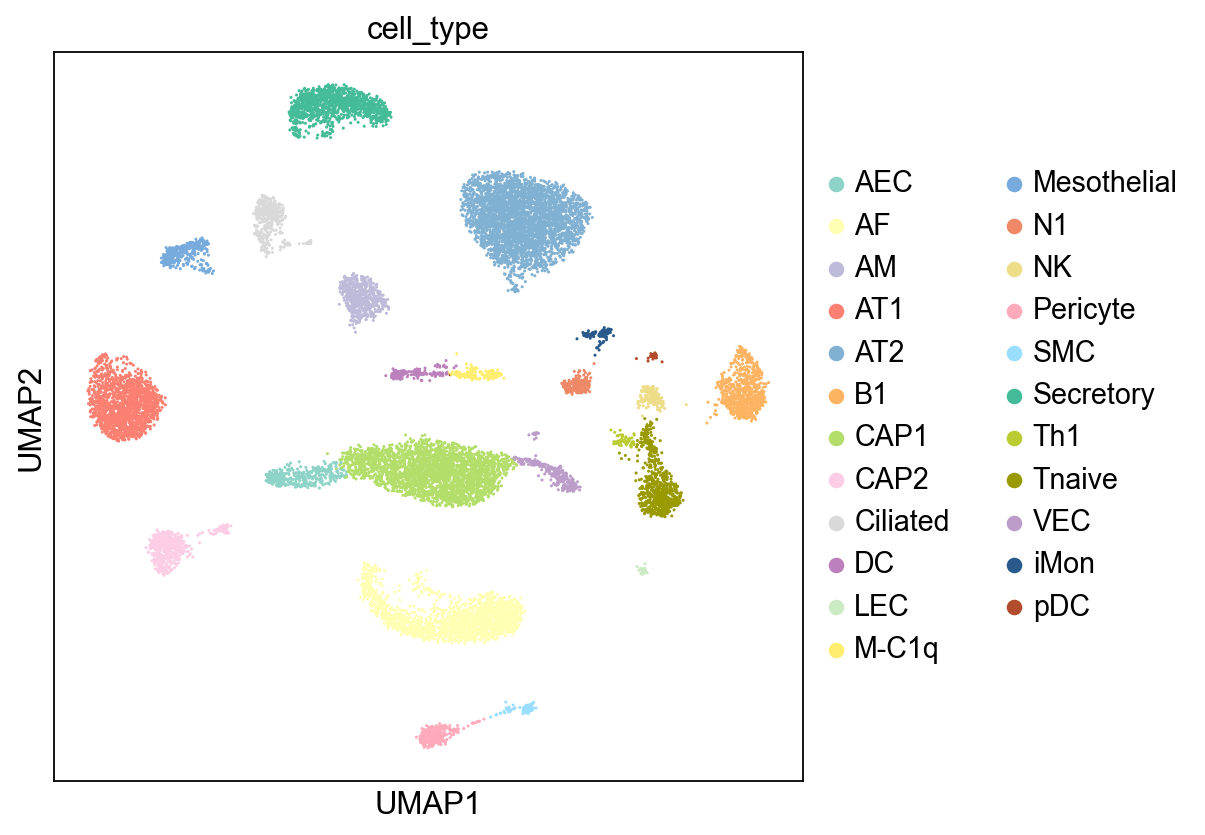

In [19]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures
sc.pl.umap(adata, color=['cell_type'])